## 1. Using neural nets to recognize handwritten digits

The human visual system is one of the wonders of the world. Consider the following sequence of handwritten digits:

![digits](./images/digits.png)

Most people effortlessly recognize those digits as 504192. That ease is deceptive. In each hemisphere of our brain, humans have a primary visual cortex, also known as V1, containing 140 million neurons, with tens of billions of connections between them. And yet human vision involves not just V1, but an entire series of visual cortices - V2, V3, V4, and V5 - doing progressively more complex image processing. We carry in our heads a supercomputer, tuned by evolution over hundreds of millions of years, and superbly adapted to understand the visual world. Recognizing handwritten digits isn't easy. Rather, we humans are stupendously, astoundingly good at making sense of what our eyes show us. But nearly all that work is done unconsciously. And so we don't usually appreciate how tough a problem our visual systems solve.

The difficulty of visual pattern recognition becomes apparent if you attempt to write a computer program to recognize digits like those above. What seems easy when we do it ourselves suddenly becomes extremely difficult. Simple intuitions about how we recognize shapes - "a 9 has a loop at the top, and a vertical stroke in the bottom right" - turn out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases. It seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits, known as training examples,

![digit-learn](./images/digit-learn.png)

and then develop a system which can learn from those training examples. In other words, the neural network uses the examples to automatically infer rules for recognizing handwritten digits. Furthermore, by increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So while I've shown just 100 training digits above, perhaps we could build a better handwriting recognizer by using thousands or even millions or billions of training examples.

## 1.1 Perceptrons

We start with a type of artificial neuron called a perceptron. Today, it's more common to use other models of artificial neurons, the main neuron model used is one called the sigmoid neuron. We'll get to sigmoid neurons shortly. But to understand why sigmoid neurons are defined the way they are, it's worth taking the time to first understand perceptrons.

So how do perceptrons work? A perceptron takes several binary inputs, $x_1$,$x_2$,…, and produces a **single binary** output:

![Perceptron](./images/Perceptron.png)

In the example shown the perceptron has three inputs, $x_1$,$x_2$,$x_3$. In general it could have more or fewer inputs. There is a simple rule to compute the output. The weights, $w_1$,$w_2$,…, are real numbers expressing the importance of the respective inputs to the output. The neuron's output, 0 or 1, is determined by whether the weighted sum $\sum_jw_jx_j$ is less than or greater than some threshold value. Just like the weights, the threshold is a real number which is a parameter of the neuron. To put it in more precise algebraic terms:

$$
\text{output}=\begin{cases}
1 & \text{if} ~ \sum_{j} w_jx_j \leq \text{threshold}\\ 
0 & \text{if} ~ \sum_{j} w_jx_j > \text{threshold}
\end{cases}
$$

**Note:** By varying the weights and the threshold, we can get different models of decision-making. 

Obviously, the perceptron isn't a complete model of human decision-making! But what the example illustrates is how a perceptron can weigh up different kinds of evidence in order to make decisions. And it should seem plausible that a complex network of perceptrons could make quite subtle decisions:

![layers](./images/layers.png)

The first layer of perceptrons is making decisions by weighing the input evidence. Each of those perceptrons is making a decision by weighing up the results from the first layer of decision-making. In this way a perceptron in the second layer can make a decision at a more complex and more abstract level than perceptrons in the first layer. And even more complex decisions can be made by the perceptron in the third layer. In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

Incidentally, when I defined perceptrons I said that a perceptron has just a single output. In the network above the perceptrons look like they have multiple outputs. In fact, they're still single output. The multiple output arrows are merely a useful way of indicating that the output from a perceptron is being used as the input to several other perceptrons. It's less unwieldy than drawing a single output line which then splits.

Let's simplify the way we describe perceptrons. The condition $\sum_jw_jx_j > threshold$  is cumbersome, and we can make two notational changes to simplify it. The first change is to write $\sum_jw_jx_j$ as a dot product, $w\cdot x \equiv \sum_jw_jx_j$, where w and x are vectors whose components are the weights and inputs, respectively. The second change is to move the threshold to the other side of the inequality, and to replace it by what's known as the perceptron's bias, b≡−threshold. Using the bias instead of the threshold, the perceptron rule can be rewritten:

$$
\text{output}=\begin{cases}
1 & \text{if} ~ w\cdot x + b \leq 0\\ 
0 & \text{if} ~ w\cdot x + b > 0
\end{cases}
$$

You can think of the bias as a measure of how easy it is to get the perceptron to output a 1. Or to put it in more biological terms, the bias is a measure of how easy it is to get the perceptron to fire. For a perceptron with a really big bias, it's extremely easy for the perceptron to output a 1. But if the bias is very negative, then it's difficult for the perceptron to output a 1. Obviously, introducing the bias is only a small change in how we describe perceptrons, but we'll see later that it leads to further notational simplifications. Because of this, From now on we will use the terminology bias rather than threshold.

I've described perceptrons as a method for weighing evidence to make decisions. Another way perceptrons can be used is to compute the elementary logical functions we usually think of as underlying computation, functions such as AND, OR, and NAND. For example, suppose we have a perceptron with two inputs, each with weight −2, and an overall bias of 3. Here's our perceptron:

![NAND](./images/NAND.png)

Then we see that input 00 produces output 1, since (−2)∗0+(−2)∗0+3=3 is positive. Here, I've introduced the ∗ symbol to make the multiplications explicit. Similar calculations show that the inputs 01 and 10 produce output 1. But the input 11 produces output 0, since (−2)∗1+(−2)∗1+3=−1 is negative. And so our perceptron implements a NAND gate!

**NAND Gate:**

![NAND-def](./images/NAND-def.png)

The NAND example shows that we can use perceptrons to compute simple logical functions. In fact, we can use networks of perceptrons to compute any logical function at all. The reason is that the NAND gate is universal for computation, that is, we can build any computation up out of NAND gates. For example, we can use NAND gates to build a circuit which adds two bits, x1 and x2. This requires computing the bitwise sum, $x_1⊕x_2$, as well as a carry bit which is set to 1 when both $x1_$ and $x_2$ are 1, i.e., the carry bit is just the bitwise product $x_1x_2$:

![XOR](./images/XOR.png)

To get an equivalent network of perceptrons we replace all the NAND gates by perceptrons with two inputs, each with weight −2, and an overall bias of 3. Here's the resulting network. Note that I've moved the perceptron corresponding to the bottom right NAND gate a little, just to make it easier to draw the arrows on the diagram:

![XOR2](./images/XOR2.png)

Thus, the network looks as follows, with all unmarked weights equal to -2, all biases equal to 3, and a single weight of -4, as marked:

![XOR3](./images/XOR3.png)

Up to now I've been drawing inputs like x1 and x2 as variables floating to the left of the network of perceptrons. In fact, it's conventional to draw an extra layer of perceptrons - the ***input layer*** - to encode the inputs:

![XOR4](./images/XOR4.png)

This notation for input perceptrons, in which we have an output, but no inputs,

![input](./images/input.png)

is a shorthand. It doesn't actually mean a perceptron with no inputs. To see this, suppose we did have a perceptron with no inputs. Then the weighted sum $\sum_jw_jx_j$ would always be zero, and so the perceptron would output 1 if $b>0$, and 0 if $b\leq 0$. That is, the perceptron would simply output a fixed value, not the desired value (x1, in the example above). It's better to think of the input perceptrons as not really being perceptrons at all, but rather special units which are simply defined to output the desired values, $x_1$,$x_2$,….

The adder example demonstrates how a network of perceptrons can be used to simulate a circuit containing many NAND gates. And because NAND gates are universal for computation, it follows that perceptrons are also universal for computation.

## 1.2 Sigmoid neurons (logistic neurons)

Suppose we have a network of perceptrons that we'd like to use to learn to solve some problem. For example, the inputs to the network might be the raw pixel data from a scanned, handwritten image of a digit. And we'd like the network to learn weights and biases so that the output from the network correctly classifies the digit. To see how learning might work, suppose we make a small change in some weight (or bias) in the network. What we'd like is for this small change in weight to cause only a small corresponding change in the output from the network. As we'll see in a moment, this property will make learning possible. Schematically, here's what we want :

![Sigmoid](./images/Sigmoid.png)

If it were true that a small change in a weight (or bias) causes only a small change in output, then we could use this fact to modify the weights and biases to get our network to behave more in the manner we want. For example, suppose the network was mistakenly classifying an image as an "8" when it should be a "9". We could figure out how to make a small change in the weights and biases so the network gets a little closer to classifying the image as a "9". And then we'd repeat this, changing the weights and biases over and over to produce better and better output. The network would be learning.

The problem is that this isn't what happens when our network contains perceptrons. In fact, a small change in the weights or bias of any single perceptron in the network can sometimes cause the output of that perceptron to completely flip, say from 0 to 1. That flip may then cause the behaviour of the rest of the network to completely change in some very complicated way. So while your "9" might now be classified correctly, the behaviour of the network on all the other images is likely to have completely changed in some hard-to-control way. That makes it difficult to see how to gradually modify the weights and biases so that the network gets closer to the desired behaviour. Perhaps there's some clever way of getting around this problem. But it's not immediately obvious how we can get a network of perceptrons to learn.

**sigmoid (logestic) neuron**

We can overcome this problem by introducing a new type of artificial neuron called a *sigmoid neuron*. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output. That's the crucial fact which will allow a network of sigmoid neurons to learn.

Okay, let me describe the sigmoid neuron. We'll depict sigmoid neurons in the same way we depicted perceptrons:

![Perceptron](./images/Perceptron.png)

Just like a perceptron, the sigmoid neuron has inputs, $x_1$,$x_2$,…. But instead of being just 0 or 1, these inputs can also take on any values between 0 and 1. So, for instance, 0.638… is a valid input for a sigmoid neuron. Also just like a perceptron, the sigmoid neuron has weights for each input, $w_1$,$w_2$,…, and an overall bias, b. But the output is not 0 or 1. Instead, it's $\sigma(w v\cdot x+b)$, where σ is called the sigmoid (logestic) function

$$
\sigma(z) \equiv \frac{1}{1+e^{-z}}
$$

To put it all a little more explicitly, the output of a sigmoid neuron with inputs $x_1$,$x_2$,…, weights $w_1$,$w_2$,…, and bias b is

$$
\frac{1}{1+exp(-\sum{_j}{w_jx_j}-b)}
$$

At first sight, sigmoid neurons appear very different to perceptrons. The algebraic form of the sigmoid function may seem opaque and forbidding if you're not already familiar with it. In fact, there are many similarities between perceptrons and sigmoid neurons, and the algebraic form of the sigmoid function turns out to be more of a technical detail than a true barrier to understanding.

To understand the similarity to the perceptron model, suppose $z \equiv w \cdot x+b$ is a large positive number. Then $e−z \approx 0$ and so $\sigma(z) \approx 1$. In other words, when $z=w \cdot x+b$ is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron. Suppose on the other hand that $z=w \cdot x+b$ is very negative. Then $e−z \rightarrow \infty$, and $\sigma(z) \approx 0$. So when $z=w \cdot x+b$ is very negative, the behaviour of a sigmoid neuron also closely approximates a perceptron. It's only when $w \cdot x+b$ is of modest size that there's much deviation from the perceptron model.

What about the algebraic form of $\sigma$? How can we understand that? In fact, the exact form of $\sigma$ isn't so important - what really matters is the shape of the function when plotted. Here's the shape:

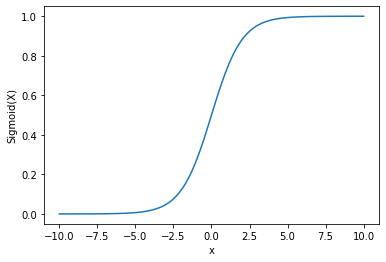

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

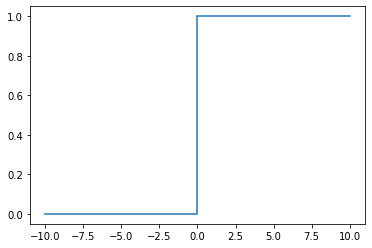

In [12]:
plt.step([-10,0,10], [0,0,1])

If σ had in fact been a step function, then the sigmoid neuron would be a perceptron, since the output would be 1 or 0 depending on whether $w \cdot x+b$ was positive or negative. By using the actual $\sigma$ function we get, as already implied above, a smoothed out perceptron. Indeed, it's the smoothness of the σ function that is the crucial fact, not its detailed form. The smoothness of $\sigma$ means that small changes $\Delta w_j$ in the weights and $\Delta b$ in the bias will produce a small change Δoutput in the output from the neuron. In fact, calculus tells us that Δoutput is well approximated by

$$
\Delta output \approx \sum_j \frac{\partial output}{\partial w_j} \Delta w_j + \frac{\partial output}{\partial b} \Delta b
$$

where the sum is over all the weights, wj, and $\partial output/\partial w_j$ and $\partial output/\partial b$ denote partial derivatives of the output with respect to $w_j$ and $b$, respectively. Don't panic if you're not comfortable with partial derivatives! While the expression above looks complicated, with all the partial derivatives, it's actually saying something very simple (and which is very good news): $\Delta output$ is a linear function of the changes $\Delta w_j$ and $\Delta b$ in the weights and bias. This linearity makes it easy to choose small changes in the weights and biases to achieve any desired small change in the output. So while sigmoid neurons have much of the same qualitative behaviour as perceptrons, they make it much easier to figure out how changing the weights and biases will change the output.

If it's the shape of σ which really matters, and not its exact form, then why use the particular form used for σ in logestic function? In fact, later in the book we will occasionally consider neurons where the output is $f(w \cdot x+b)$ for some other activation function $f(\cdot)$. 

How should we interpret the output from a sigmoid neuron? Obviously, one big difference between perceptrons and sigmoid neurons is that sigmoid neurons don't just output 0 or 1. They can have as output any real number between 0 and 1, so values such as 0.173… and 0.689… are legitimate outputs. This can be useful, for example, if we want to use the output value to represent the average intensity of the pixels in an image input to a neural network. But sometimes it can be a nuisance. Suppose we want the output from the network to indicate either "the input image is a 9" or "the input image is not a 9". Obviously, it'd be easiest to do this if the output was a 0 or a 1, as in a perceptron. But in practice we can set up a convention to deal with this, for example, by deciding to interpret any output of at least 0.5 as indicating a "9", and any output less than 0.5 as indicating "not a 9". I'll always explicitly state when we're using such a convention, so it shouldn't cause any confusion.

## 1.3 The architecture of neural networks

In the next section I'll introduce a neural network that can do a pretty good job classifying handwritten digits. In preparation for that, it helps to explain some terminology that lets us name different parts of a network. Suppose we have the network:

![Arch1](./images/Arch1.png)

As mentioned earlier, the leftmost layer in this network is called the input layer, and the neurons within the layer are called input neurons. The rightmost or output layer contains the output neurons, or, as in this case, a single output neuron. The middle layer is called a hidden layer, since the neurons in this layer are neither inputs nor outputs. The term "hidden" perhaps sounds a little mysterious - the first time I heard the term I thought it must have some deep philosophical or mathematical significance - but it really means nothing more than "not an input or an output". The network above has just a single hidden layer, but some networks have multiple hidden layers. For example, the following four-layer network has two hidden layers:

![Arch2](./images/Arch2.png)

Somewhat confusingly, and for historical reasons, such multiple layer networks are sometimes called multilayer perceptrons or MLPs, despite being made up of sigmoid neurons, not perceptrons. I'm not going to use the MLP terminology in this book, since I think it's confusing, but wanted to warn you of its existence.
The design of the input and output layers in a network is often straightforward. For example, suppose we're trying to determine whether a handwritten image depicts a "9" or not. A natural way to design the network is to encode the intensities of the image pixels into the input neurons. If the image is a 64 by 64 greyscale image, then we'd have 4,096=64×64 input neurons, with the intensities scaled appropriately between 0 and 1. The output layer will contain just a single neuron, with output values of less than 0.5 indicating "input image is not a 9", and values greater than 0.5 indicating "input image is a 9 ".

While the design of the input and output layers of a neural network is often straightforward, there can be quite an art to the design of the hidden layers. In particular, it's not possible to sum up the design process for the hidden layers with a few simple rules of thumb. Instead, neural networks researchers have developed many design heuristics for the hidden layers, which help people get the behaviour they want out of their nets. For example, such heuristics can be used to help determine how to trade off the number of hidden layers against the time required to train the network. We'll meet several such design heuristics later in this book.

Up to now, we've been discussing neural networks where the output from one layer is used as input to the next layer. Such networks are called feedforward neural networks. This means there are no loops in the network - information is always fed forward, never fed back. If we did have loops, we'd end up with situations where the input to the σ function depended on the output. That'd be hard to make sense of, and so we don't allow such loops.

However, there are other models of artificial neural networks in which feedback loops are possible. These models are called ***recurrent neural networks***. The idea in these models is to have neurons which fire for some limited duration of time, before becoming quiescent. That firing can stimulate other neurons, which may fire a little while later, also for a limited duration. That causes still more neurons to fire, and so over time we get a cascade of neurons firing. Loops don't cause problems in such a model, since a neuron's output only affects its input at some later time, not instantaneously.

Recurrent neural nets have been less influential than feedforward networks, in part because the learning algorithms for recurrent nets are (at least to date) less powerful. But recurrent networks are still extremely interesting. They're much closer in spirit to how our brains work than feedforward networks. And it's possible that recurrent networks can solve important problems which can only be solved with great difficulty by feedforward networks. However, to limit our scope, in this book we're going to concentrate on the more widely-used feedforward networks.


## 1.4 A simple network to classify handwritten digits

Having defined neural networks, let's return to handwriting recognition. We can split the problem of recognizing handwritten digits into two sub-problems. First, we'd like a way of breaking an image containing many digits into a sequence of separate images, each containing a single digit. For example, we'd like to break the image

![segmentation](./images/segmentation.png)

We humans solve this segmentation problem with ease, but it's challenging for a computer program to correctly break up the image. Once the image has been segmented, the program then needs to classify each individual digit. So, for instance, we'd like our program to recognize that the first digit above is a 5.

We'll focus on writing a program to solve the second problem, that is, classifying individual digits. We do this because it turns out that the segmentation problem is not so difficult to solve, once you have a good way of classifying individual digits. There are many approaches to solving the segmentation problem. One approach is to trial many different ways of segmenting the image, using the individual digit classifier to score each trial segmentation. A trial segmentation gets a high score if the individual digit classifier is confident of its classification in all segments, and a low score if the classifier is having a lot of trouble in one or more segments. The idea is that if the classifier is having trouble somewhere, then it's probably having trouble because the segmentation has been chosen incorrectly. This idea and other variations can be used to solve the segmentation problem quite well. So instead of worrying about segmentation we'll concentrate on developing a neural network which can solve the more interesting and difficult problem, namely, recognizing individual handwritten digits.

To recognize individual digits we will use a three-layer neural network:

![network](./images/network.png)

The input layer of the network contains neurons encoding the values of the input pixels. As discussed in the next section, our training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. For simplicity I've omitted most of the 784 input neurons in the diagram above. The input pixels are greyscale, with a value of 0.0 representing white, a value of 1.0 representing black, and in between values representing gradually darkening shades of grey.

![784](./images/784.png)

The second layer of the network is a hidden layer. We denote the number of neurons in this hidden layer by n, and we'll experiment with different values for n. The example shown illustrates a small hidden layer, containing just n=15 neurons.

The output layer of the network contains 10 neurons. If the first neuron fires, i.e., has an output ≈1, then that will indicate that the network thinks the digit is a 0. If the second neuron fires then that will indicate that the network thinks the digit is a 1. And so on. A little more precisely, we number the output neurons from 0 through 9, and figure out which neuron has the highest activation value. If that neuron is, say, neuron number 6, then our network will guess that the input digit was a 6. And so on for the other output neurons.

You might wonder why we use 10 output neurons. After all, the goal of the network is to tell us which digit (0,1,2,…,9) corresponds to the input image. A seemingly natural way of doing that is to use just 4 output neurons, treating each neuron as taking on a binary value, depending on whether the neuron's output is closer to 0 or to 1. Four neurons are enough to encode the answer, since 24=16 is more than the 10 possible values for the input digit. Why should our network use 10 neurons instead? Isn't that inefficient? The ultimate justification is empirical: we can try out both network designs, and it turns out that, for this particular problem, the network with 10 output neurons learns to recognize digits better than the network with 4 output neurons. But that leaves us wondering why using 10 output neurons works better. Is there some heuristic that would tell us in advance that we should use the 10-output encoding instead of the 4-output encoding?

To understand why we do this, it helps to think about what the neural network is doing from first principles. Consider first the case where we use 10 output neurons. Let's concentrate on the first output neuron, the one that's trying to decide whether or not the digit is a 0. It does this by weighing up evidence from the hidden layer of neurons. What are those hidden neurons doing? Well, just suppose for the sake of argument that the first neuron in the hidden layer detects whether or not an image like the following is present:

![0-1](./images/0-1.png)

It can do this by heavily weighting input pixels which overlap with the image, and only lightly weighting the other inputs. In a similar way, let's suppose for the sake of argument that the second, third, and fourth neurons in the hidden layer detect whether or not the following images are present:

![0-2](./images/0-2.png)

As you may have guessed, these four images together make up the 0 image that we saw in the line of digits shown earlier:

![0-3](./images/0-3.png)

So if all four of these hidden neurons are firing then we can conclude that the digit is a 0. Of course, that's not the only sort of evidence we can use to conclude that the image was a 0 - we could legitimately get a 0 in many other ways (say, through translations of the above images, or slight distortions). But it seems safe to say that at least in this case we'd conclude that the input was a 0.

Supposing the neural network functions in this way, we can give a plausible explanation for why it's better to have 10 outputs from the network, rather than 4. If we had 4 outputs, then the first output neuron would be trying to decide what the most significant bit of the digit was. And there's no easy way to relate that most significant bit to simple shapes like those shown above. It's hard to imagine that there's any good historical reason the component shapes of the digit will be closely related to (say) the most significant bit in the output.

Now, with all that said, this is all just a heuristic. Nothing says that the three-layer neural network has to operate in the way I described, with the hidden neurons detecting simple component shapes. Maybe a clever learning algorithm will find some assignment of weights that lets us use only 4 output neurons. But as a heuristic the way of thinking I've described works pretty well, and can save you a lot of time in designing good neural network architectures.

## 1.5 Learning with gradient descent

Now that we have a design for our neural network, how can it learn to recognize digits? The first thing we'll need is a data set to learn from - a so-called training data set. We'll use the [MNIST data set](#http://yann.lecun.com/exdb/mnist/), which contains tens of thousands of scanned images of handwritten digits, together with their correct classifications. MNIST's name comes from the fact that it is a modified subset of two data sets collected by [NIST](#https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology), the United States' National Institute of Standards and Technology. Here's a few images from MNIST:

![segmentation2](./images/segmentation2.png)

As you can see, these digits are, in fact, the same as those shown at the beginning of this chapter as a challenge to recognize. Of course, when testing our network we'll ask it to recognize images which aren't in the training set!

The MNIST data comes in two parts. The first part contains 60,000 images to be used as training data. These images are scanned handwriting samples from 250 people, half of whom were US Census Bureau employees, and half of whom were high school students. The images are greyscale and 28 by 28 pixels in size. The second part of the MNIST data set is 10,000 images to be used as test data. Again, these are 28 by 28 greyscale images. We'll use the test data to evaluate how well our neural network has learned to recognize digits. To make this a good test of performance, the test data was taken from a different set of 250 people than the original training data (albeit still a group split between Census Bureau employees and high school students). This helps give us confidence that our system can recognize digits from people whose writing it didn't see during training.

We'll use the notation x to denote a training input. It'll be convenient to regard each training input $x$ as a 28×28=784-dimensional vector. Each entry in the vector represents the grey value for a single pixel in the image. We'll denote the corresponding desired output by $y=y(x)$, where $y$ is a 10-dimensional vector. For example, if a particular training image, $x$, depicts a 6, then $y(x)=(0,0,0,0,0,0,1,0,0,0)^T$ is the desired output from the network. Note that T here is the transpose operation, turning a row vector into an ordinary (column) vector.

What we'd like is an algorithm which lets us find weights and biases so that the output from the network approximates $y(x)$ for all training inputs $x$. To quantify how well we're achieving this goal we define a _cost function_:

$$
C(w,b)=\frac{1}{2n} \sum_x \|y(x)-a\|^2
$$

Here, $w$ denotes the collection of all weights in the network, $b$ all the biases, $n$ is the total number of training inputs, a is the vector of outputs from the network when $x$ is input, and the sum is over all training inputs, $x$. Of course, the output a depends on $x$, $w$ and $b$, but to keep the notation simple I haven't explicitly indicated this dependence. The notation $\|v\|$ just denotes the usual length function for a vector $v$. We'll call $C$ the quadratic cost function; it's also sometimes known as the mean squared error or just MSE. Inspecting the form of the quadratic cost function, we see that $C(w,b)$ is non-negative, since every term in the sum is non-negative. Furthermore, the cost $C(w,b)$ becomes small, i.e., $C(w,b)\approx 0$, precisely when $y(x)$ is approximately equal to the output, a, for all training inputs, x. So our training algorithm has done a good job if it can find weights and biases so that $C(w,b)\approx 0$. By contrast, it's not doing so well when $C(w,b)$ is large - that would mean that $y(x)$ is not close to the output a for a large number of inputs. So the aim of our training algorithm will be to minimize the cost $C(w,b)$ as a function of the weights and biases. In other words, we want to find a set of weights and biases which make the cost as small as possible. We'll do that using an algorithm known as gradient descent.

Why introduce the quadratic cost? After all, aren't we primarily interested in the number of images correctly classified by the network? Why not try to maximize that number directly, rather than minimizing a proxy measure like the quadratic cost? The problem with that is that the number of images correctly classified is not a smooth function of the weights and biases in the network. For the most part, making small changes to the weights and biases won't cause any change at all in the number of training images classified correctly. That makes it difficult to figure out how to change the weights and biases to get improved performance. If we instead use a smooth cost function like the quadratic cost it turns out to be easy to figure out how to make small changes in the weights and biases so as to get an improvement in the cost. That's why we focus first on minimizing the quadratic cost, and only after that will we examine the classification accuracy.

Even given that we want to use a smooth cost function, you may still wonder why we choose the quadratic function used above. Isn't this a rather ad hoc choice? Perhaps if we chose a different cost function we'd get a totally different set of minimizing weights and biases? This is a valid concern, and later we'll revisit the cost function, and make some modifications. However, the quadratic cost function works perfectly well for understanding the basics of learning in neural networks, so we'll stick with it for now.

Recapping, our goal in training a neural network is to find weights and biases which minimize the quadratic cost function $C(w,b)$. This is a well-posed problem, but it's got a lot of distracting structure as currently posed - the interpretation of $w$ and b as weights and biases, the σ function lurking in the background, the choice of network architecture, MNIST, and so on. It turns out that we can understand a tremendous amount by ignoring most of that structure, and just concentrating on the minimization aspect. So for now we're going to forget all about the specific form of the cost function, the connection to neural networks, and so on. Instead, we're going to imagine that we've simply been given a function of many variables and we want to minimize that function. We're going to develop a technique called gradient descent which can be used to solve such minimization problems. Then we'll come back to the specific function we want to minimize for neural networks.

Okay, let's suppose we're trying to minimize some function, $C(v)$. This could be any real-valued function of many variables, $v$=$v_1$,$v_2$,…. Note that I've replaced the $w$ and $b$ notation by $v$ to emphasize that this could be any function - we're not specifically thinking in the neural networks context any more. To minimize $C(v)$ it helps to imagine $C$ as a function of just two variables, which we'll call $v_1$ and $v_2$:

![gradient](./images/gradient.png)

What we'd like is to find where $C$ achieves its global minimum. Now, of course, for the function plotted above, we can eyeball the graph and find the minimum. In that sense, I've perhaps shown slightly too simple a function! A general function, $C$, may be a complicated function of many variables, and it won't usually be possible to just eyeball the graph to find the minimum.

One way of attacking the problem is to use calculus to try to find the minimum analytically. We could compute derivatives and then try using them to find places where $C$ is an extremum. With some luck that might work when $C$ is a function of just one or a few variables. But it'll turn into a nightmare when we have many more variables. And for neural networks we'll often want far more variables - the biggest neural networks have cost functions which depend on billions of weights and biases in an extremely complicated way. Using calculus to minimize that just won't work!

(After asserting that we'll gain insight by imagining $C$ as a function of just two variables, I've turned around twice in two paragraphs and said, "hey, but what if it's a function of many more than two variables?" Sorry about that. Please believe me when I say that it really does help to imagine $C$ as a function of two variables. It just happens that sometimes that picture breaks down, and the last two paragraphs were dealing with such breakdowns. Good thinking about mathematics often involves juggling multiple intuitive pictures, learning when it's appropriate to use each picture, and when it's not.)


Okay, so calculus doesn't work. Fortunately, there is a beautiful analogy which suggests an algorithm which works pretty well. We start by thinking of our function as a kind of a valley. If you squint just a little at the plot above, that shouldn't be too hard. And we imagine a ball rolling down the slope of the valley. Our everyday experience tells us that the ball will eventually roll to the bottom of the valley. Perhaps we can use this idea as a way to find a minimum for the function? We'd randomly choose a starting point for an (imaginary) ball, and then simulate the motion of the ball as it rolled down to the bottom of the valley. We could do this simulation simply by computing derivatives (and perhaps some second derivatives) of $C$ - those derivatives would tell us everything we need to know about the local "shape" of the valley, and therefore how our ball should roll.

Based on what I've just written, you might suppose that we'll be trying to write down Newton's equations of motion for the ball, considering the effects of friction and gravity, and so on. Actually, we're not going to take the ball-rolling analogy quite that seriously - we're devising an algorithm to minimize $C$, not developing an accurate simulation of the laws of physics! The ball's-eye view is meant to stimulate our imagination, not constrain our thinking. So rather than get into all the messy details of physics, let's simply ask ourselves: if we were declared God for a day, and could make up our own laws of physics, dictating to the ball how it should roll, what law or laws of motion could we pick that would make it so the ball always rolled to the bottom of the valley?

To make this question more precise, let's think about what happens when we move the ball a small amount $\Delta v_1$ in the $v_1$ direction, and a small amount $\Delta v_2$ in the $v_2$ direction. Calculus tells us that $C$ changes as follows:

$$
\Delta C \approx \frac{\partial C}{\partial \nu_1}\Delta\nu_1 + \frac{\partial C}{\partial \nu_2}\Delta\nu_2 
$$

We're going to find a way of choosing $\Delta v_1$ and $\Delta v_2$ so as to make $\Delta C$ negative; i.e., we'll choose them so the ball is rolling down into the valley. To figure out how to make such a choice it helps to define $\Delta v$ to be the vector of changes in $v$, $\Delta v \equiv (\Delta v_1,\Delta v_2)T$, where $T$ is again the transpose operation, turning row vectors into column vectors. We'll also define the gradient of $C$ to be the vector of partial derivatives, $(\partial C\partial v_1,\partial C \partial v_2)^T$. We denote the gradient vector by $\nabla C$, i.e.:

$$
\nabla C \equiv \Big{(}\frac{\partial C}{\partial \nu_1}, \frac{\partial C}{\partial \nu_2}\Big{)}^T
$$

In a moment we'll rewrite the change $\Delta C$ in terms of $\Delta v$ and the gradient, $\nabla C$. Before getting to that, though, I want to clarify something that sometimes gets people hung up on the gradient. When meeting the $\nabla C$ notation for the first time, people sometimes wonder how they should think about the $\nabla$ symbol. What, exactly, does $\nabla$ mean? In fact, it's perfectly fine to think of $\nabla C$ as a single mathematical object - the vector defined above - which happens to be written using two symbols. In this point of view, $\nabla$ is just a piece of notational flag-waving, telling you "hey, $\nabla C$ is a gradient vector". There are more advanced points of view where $\nabla$ can be viewed as an independent mathematical entity in its own right (for example, as a differential operator), but we won't need such points of view.

With these definitions, the expression for $\Delta C$ can be rewritten as

$$
\Delta C \approx \nabla C \cdot \Delta \nu
$$

This equation helps explain why $\nabla C$ is called the gradient vector: $\nabla C$ relates changes in $v$ to changes in $C$, just as we'd expect something called a gradient to do. But what's really exciting about the equation is that it lets us see how to choose $\Delta v$ so as to make $\Delta C$ negative. In particular, suppose we choose

$$
\Delta \nu = -\eta \nabla C
$$

where $\eta$ is a small, positive parameter (known as the learning rate). Then previous equation tells us that $\Delta C \approx −\eta \nabla C \cdot \nabla C=−\eta \|\nabla C\|^2$. Because $\|\nabla C\|^2 \geq 0$, this guarantees that $\Delta C \leq 0$, i.e., $C$ will always decrease, never increase, if we change v according to the prescription in above equation. (Within, of course, the limits of the approximation in Equation $\Delta C$). This is exactly the property we wanted! And so we'll take above Equation to define the "law of motion" for the ball in our gradient descent algorithm. That is, we'll use this Equation to compute a value for $\Delta v$, then move the ball's position $v$ by that amount:

$$
\nu \rightarrow \nu' = \nu-\eta \nabla C
$$

Then we'll use this update rule again, to make another move. If we keep doing this, over and over, we'll keep decreasing $C$ until - we hope - we reach a global minimum.

Summing up, the way the gradient descent algorithm works is to repeatedly compute the gradient $\nabla C$, and then to move in the opposite direction, "falling down" the slope of the valley. We can visualize it like this:

![gradient](./images/gradient.png)

Notice that with this rule gradient descent doesn't reproduce real physical motion. In real life a ball has momentum, and that momentum may allow it to roll across the slope, or even (momentarily) roll uphill. It's only after the effects of friction set in that the ball is guaranteed to roll down into the valley. By contrast, our rule for choosing Δv just says "go down, right now". That's still a pretty good rule for finding the minimum!

To make gradient descent work correctly, we need to choose the learning rate η to be small enough that Equation $\Delta C \approx \nabla C \cdot \Delta \nu$ is a good approximation. If we don't, we might end up with $\Delta C>0$, which obviously would not be good! At the same time, we don't want $\eta$ to be too small, since that will make the changes $\Delta v$ tiny, and thus the gradient descent algorithm will work very slowly. In practical implementations, $\eta$ is often varied so that Equation $\Delta C \approx \nabla C \cdot \Delta \nu$ remains a good approximation, but the algorithm isn't too slow. We'll see later how this works.

I've explained gradient descent when $C$ is a function of just two variables. But, in fact, everything works just as well even when $C$ is a function of many more variables. Suppose in particular that $C$ is a function of $m$ variables, $v_1,…,v_m$. Then the change $\Delta C$ in $C$ produced by a small change $\Delta v=(\Delta v_1,…,\Delta v_m)^T$ is

$$
\Delta C \approx \nabla C \cdot \Delta \nu
$$

where the gradient $\nabla C$ is the vector

$$
\Delta C \equiv \Big{(}\frac{\partial C}{\partial \nu_1},\ldots,\frac{\partial C}{\partial \nu_1} \Big{)}
$$

Just as for the two variable case, we can choose

$$
\Delta \nu = -\eta \nabla C
$$

and we're guaranteed that our (approximate) expression (12) for $\Delta C$ will be negative. This gives us a way of following the gradient to a minimum, even when $C$ is a function of many variables, by repeatedly applying the update rule

$$
\nu \rightarrow \nu'= \nu-\eta \nabla C
$$

You can think of this update rule as defining the gradient descent algorithm. It gives us a way of repeatedly changing the position v in order to find a minimum of the function $C$. The rule doesn't always work - several things can go wrong and prevent gradient descent from finding the global minimum of $C$, a point we'll return to explore in later chapters. But, in practice gradient descent often works extremely well, and in neural networks we'll find that it's a powerful way of minimizing the cost function, and so helping the net learn.

Indeed, there's even a sense in which gradient descent is the optimal strategy for searching for a minimum. Let's suppose that we're trying to make a move Δv in position so as to decrease $C$ as much as possible. This is equivalent to minimizing $\Delta C\approx \nabla C\cdot \Delta v$. We'll constrain the size of the move so that $\|\Delta v\|=\epsilon$ for some small fixed $\epsilon>0$. In other words, we want a move that is a small step of a fixed size, and we're trying to find the movement direction which decreases $C$ as much as possible. It can be proved that the choice of $\Delta v$ which minimizes $\nabla C \cdot \Delta v$ is $\Delta v=−\eta \nabla C$, where $\eta =\epsilon \|\Delta C\|$ is determined by the size constraint $\|\Delta v\|=\epsilon$. So gradient descent can be viewed as a way of taking small steps in the direction which does the most to immediately decrease $C$.

People have investigated many variations of gradient descent, including variations that more closely mimic a real physical ball. These ball-mimicking variations have some advantages, but also have a major disadvantage: it turns out to be necessary to compute second partial derivatives of $C$, and this can be quite costly. To see why it's costly, suppose we want to compute all the second partial derivatives $\partial^2C/\partial v_j \partial v_k$. If there are a million such $v_j$ variables then we'd need to compute something like a trillion (i.e., a million squared) second partial derivatives. That's going to be computationally costly. With that said, there are tricks for avoiding this kind of problem, and finding alternatives to gradient descent is an active area of investigation. But in this book we'll use gradient descent (and variations) as our main approach to learning in neural networks.

How can we apply gradient descent to learn in a neural network? The idea is to use gradient descent to find the weights wk and biases $b_l$ which minimize the cost in Equation (6). To see how this works, let's restate the gradient descent update rule, with the weights and biases replacing the variables $v_j$. In other words, our "position" now has components $w_k$ and $b_l$, and the gradient vector $\nabla C$ has corresponding components $\partial C/\partial w_k$ and $\partial C/\partial b_l$. Writing out the gradient descent update rule in terms of components, we have

$$
w_k \rightarrow w_k' = w_k -\eta \frac{\partial C}{\partial w_k} \\
b_l \rightarrow b_l' = b_l -\eta \frac{\partial C}{\partial b_l}
$$

By repeatedly applying this update rule we can "roll down the hill", and hopefully find a minimum of the cost function. In other words, this is a rule which can be used to learn in a neural network.

There are a number of challenges in applying the gradient descent rule. We'll look into those in depth in later chapters. But for now I just want to mention one problem. To understand what the problem is, let's look back at the quadratic cost in Equation (6). Notice that this cost function has the form $C=\frac{1}{n}\sum_x C_x$, that is, it's an average over costs $C_x\equiv \frac{\|y(x)−a\|^2}{2}$ for individual training examples. In practice, to compute the gradient $\nabla C$ we need to compute the gradients $\nabla Cx$ separately for each training input, $x$, and then average them, $\nabla C=\frac{1}{n}\sum_x\nabla C_x$. Unfortunately, when the number of training inputs is very large this can take a long time, and learning thus occurs slowly.

An idea called stochastic gradient descent can be used to speed up learning. The idea is to estimate the gradient $\nabla C$ by computing $\nabla C_x$ for a small sample of randomly chosen training inputs. By averaging over this small sample it turns out that we can quickly get a good estimate of the true gradient $\nabla C$, and this helps speed up gradient descent, and thus learning.

To make these ideas more precise, stochastic gradient descent works by randomly picking out a small number m of randomly chosen training inputs. We'll label those random training inputs $X_1,X_2,…,X_m$, and refer to them as a mini-batch. Provided the sample size m is large enough we expect that the average value of the $\nabla C_{X_j}$ will be roughly equal to the average over all $\nabla C_x$, that is,

$$
\frac{\sum_{j-1}^{m}\nabla C_{x_j}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C
$$

where the second sum is over the entire set of training data. Swapping sides we get

$$
\nabla C \approx \frac{1}{m}\sum_{j=1}^{m}\nabla C_{X_j}
$$

confirming that we can estimate the overall gradient by computing gradients just for the randomly chosen mini-batch.

To connect this explicitly to learning in neural networks, suppose $w_k$ and $b_l$ denote the weights and biases in our neural network. Then stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,

$$
w_k \rightarrow w_k' = w_k -\frac{\eta}{m} \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
b_l \rightarrow b_l' = b_l -\frac{\eta}{m} \sum_j \frac{\partial C_{X_j}}{\partial b_l}
$$

where the sums are over all the training examples $X_j$ in the current mini-batch. Then we pick out another randomly chosen mini-batch and train with those. And so on, until we've exhausted the training inputs, which is said to complete an epoch of training. At that point we start over with a new training epoch.

Incidentally, it's worth noting that conventions vary about scaling of the cost function and of mini-batch updates to the weights and biases. In Equation (6) we scaled the overall cost function by a factor $\frac{1}{n}$. People sometimes omit the $\frac{1}{n}$, summing over the costs of individual training examples instead of averaging. This is particularly useful when the total number of training examples isn't known in advance. This can occur if more training data is being generated in real time, for instance. And, in a similar way, the mini-batch update rules (20) and (21) sometimes omit the $\frac{1}{m}$ term out the front of the sums. Conceptually this makes little difference, since it's equivalent to rescaling the learning rate $\eta$. But when doing detailed comparisons of different work it's worth watching out for.

We can think of stochastic gradient descent as being like political polling: it's much easier to sample a small mini-batch than it is to apply gradient descent to the full batch, just as carrying out a poll is easier than running a full election. For example, if we have a training set of size $n$=60,000, as in MNIST, and choose a mini-batch size of (say) $m$=10, this means we'll get a factor of 6,000 speed up in estimating the gradient! Of course, the estimate won't be perfect - there will be statistical fluctuations - but it doesn't need to be perfect: all we really care about is moving in a general direction that will help decrease $C$, and that means we don't need an exact computation of the gradient. In practice, stochastic gradient descent is a commonly used and powerful technique for learning in neural networks, and it's the basis for most of the learning techniques we'll develop in this book.

Let me conclude this section by discussing a point that sometimes bugs people new to gradient descent. In neural networks the cost $C$ is, of course, a function of many variables - all the weights and biases - and so in some sense defines a surface in a very high-dimensional space. Some people get hung up thinking: "Hey, I have to be able to visualize all these extra dimensions". And they may start to worry: "I can't think in four dimensions, let alone five (or five million)". Is there some special ability they're missing, some ability that "real" supermathematicians have? Of course, the answer is no. Even most professional mathematicians can't visualize four dimensions especially well, if at all. The trick they use, instead, is to develop other ways of representing what's going on. That's exactly what we did above: we used an algebraic (rather than visual) representation of $\Delta C$ to figure out how to move so as to decrease $C$. People who are good at thinking in high dimensions have a mental library containing many different techniques along these lines; our algebraic trick is just one example. Those techniques may not have the simplicity we're accustomed to when visualizing three dimensions, but once you build up a library of such techniques, you can get pretty good at thinking in high dimensions. I won't go into more detail here, but if you're interested then you may enjoy reading [this discussion](#https://mathoverflow.net/questions/25983/intuitive-crutches-for-higher-dimensional-thinking) of some of the techniques professional mathematicians use to think in high dimensions. While some of the techniques discussed are quite complex, much of the best content is intuitive and accessible, and could be mastered by anyone.

## 1.6 Implementing our network to classify digits

Alright, let's write a program that learns how to recognize handwritten digits, using stochastic gradient descent and the MNIST training data. We'll do this with a short Python (2.7) program, just 74 lines of code! The first thing we need is to get the MNIST data. If you're a git user then you can obtain the data by cloning the code repository for this book,

``` python
git clone https://github.com/mnielsen/neural-networks-and-deep-learning.git
```

Incidentally, when I described the MNIST data earlier, I said it was split into 60,000 training images, and 10,000 test images. That's the official MNIST description. Actually, we're going to split the data a little differently. We'll leave the test images as is, but split the 60,000-image MNIST training set into two parts: a set of 50,000 images, which we'll use to train our neural network, and a separate 10,000 image validation set. We won't use the validation data in this chapter, but later in the book we'll find it useful in figuring out how to set certain hyper-parameters of the neural network - things like the learning rate, and so on, which aren't directly selected by our learning algorithm. Although the validation data isn't part of the original MNIST specification, many people use MNIST in this fashion, and the use of validation data is common in neural networks. When I refer to the "MNIST training data" from now on, I'll be referring to our 50,000 image data set, not the original 60,000 image data set.

Apart from the MNIST data we also need a Python library called Numpy, for doing fast linear algebra.

Let me explain the core features of the neural networks code, before giving a full listing, below. The centerpiece is a `Network` class, which we use to represent a neural network. Here's the code we use to initialize a `Network` object:

In [2]:
import numpy as np

class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

In this code, the list sizes contains the number of neurons in the respective layers. So, for example, if we want to create a Network object with 2 neurons in the first layer, 3 neurons in the second layer, and 1 neuron in the final layer, we'd do this with the code:

In [3]:
net = Network([2, 3, 1])

The biases and weights in the `Network` object are all initialized randomly, using the Numpy `np.random.randn` function to generate Gaussian distributions with mean 0 and standard deviation 1. This random initialization gives our stochastic gradient descent algorithm a place to start from. In later chapters we'll find better ways of initializing the weights and biases, but this will do for now. Note that the `Network` initialization code assumes that the first layer of neurons is an input layer, and omits to set any biases for those neurons, since biases are only ever used in computing the outputs from later layers.

Note also that the biases and weights are stored as lists of Numpy matrices. So, for example `net.weights` is a Numpy matrix storing the weights connecting the second and third layers of neurons. (It's not the first and second layers, since Python's list indexing starts at 0.) Since `net.weights` is rather verbose, let's just denote that matrix $w$. It's a matrix such that $w_{jk}$ is the weight for the connection between the $k^{th}$ neuron in the second layer, and the $j^{th}$ neuron in the third layer. This ordering of the $j$ and $k$ indices may seem strange - surely it'd make more sense to swap the $j$ and $k$ indices around? The big advantage of using this ordering is that it means that the vector of activations of the third layer of neurons is:

$$
a^{'} = \sigma(wa+b)
$$

There's quite a bit going on in this equation, so let's unpack it piece by piece. a is the vector of activations of the second layer of neurons. To obtain a′ we multiply a by the weight matrix w, and add the vector $b$ of biases. We then apply the function σ elementwise to every entry in the vector $wa+b$. (This is called vectorizing the function $\sigma$.) It's easy to verify that Equation (22) gives the same result as our earlier rule, Equation (4), for computing the output of a sigmoid neuron.

With all this in mind, it's easy to write code computing the output from a Network instance. We begin by defining the sigmoid function:

In [7]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

Note that when the input z is a vector or Numpy array, Numpy automatically applies the function sigmoid elementwise, that is, in vectorized form. We then add a feedforward method to the Network class, which, given an input a for the network, returns the corresponding output. All the method does is applies Equation (22) for each layer:

In [8]:
def feedforward(self, a):
    """Return the output of the network if "a" is input."""
    for b, w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

Of course, the main thing we want our `Network` objects to do is to learn. To that end we'll give them an `SGD` method which implements stochastic gradient descent. Here's the code. It's a little mysterious in a few places, but I'll break it down below, after the listing.

In [9]:
def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

The `training_data` is a list of tuples `(x, y)` representing the training inputs and corresponding desired outputs. The variables `epochs` and `mini_batch_size` are what you'd expect - the number of epochs to train for, and the size of the mini-batches to use when sampling. eta is the learning rate, $\eta$. If the optional argument `test_data` is supplied, then the program will evaluate the network after each epoch of training, and print out partial progress. This is useful for tracking progress, but slows things down substantially.

The code works as follows. In each epoch, it starts by randomly shuffling the training data, and then partitions it into mini-batches of the appropriate size. This is an easy way of sampling randomly from the training data. Then for each `mini_batch` we apply a single step of gradient descent. This is done by the code `self.update_mini_batch(mini_batch, eta)`, which updates the network weights and biases according to a single iteration of gradient descent, using just the training data in `mini_batch`. Here's the code for the `update_mini_batch` method:

In [10]:
def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

Most of the work is done by the line

```
delta_nabla_b, delta_nabla_w = self.backprop(x, y)
```

This invokes something called the *backpropagation* algorithm, which is a fast way of computing the gradient of the cost function. So `update_mini_batch` works simply by computing these gradients for every training example in the `mini_batch`, and then updating `self.weights` and `self.biases` appropriately.

I'm not going to show the code for `self.backprop` right now. We'll study how backpropagation works in the next chapter, including the code for `self.backprop`. For now, just assume that it behaves as claimed, returning the appropriate gradient for the cost associated to the training example $x$.

Let's look at the full program, including the documentation strings, which I omitted above. Apart from `self.backprop` the program is `self-explanatory` - all the heavy lifting is done in `self.SGD` and `self.update_mini_batch`, which we've already discussed. The `self.backprop` method makes use of a few extra functions to help in computing the gradient, namely `sigmoid_prime`, which computes the derivative of the σ function, and `self.cost_derivative`, which I won't describe here. You can get the gist of these (and perhaps the details) just by looking at the code and documentation strings. We'll look at them in detail in the next chapter. Note that while the program appears lengthy, much of the code is documentation strings intended to make the code easy to understand. In fact, the program contains just 74 lines of non-whitespace, non-comment code.

In [11]:
"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

How well does the program recognize handwritten digits? Well, let's start by loading in the MNIST data. I'll do this using a little helper program, `mnist_loader.py`, to be described below. We execute the following commands in a Python shell,

In [1]:
from SourceFiles import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Of course, this could also be done in a separate Python program, but if you're following along it's probably easiest to do in a Python shell.

After loading the MNIST data, we'll set up a `Network` with 30 hidden neurons. We do this after importing the Python program listed above, which is named `network`,

In [2]:
from SourceFiles import network
net = network.Network([784, 30, 10])

Finally, we'll use stochastic gradient descent to learn from the MNIST `training_data` over 30 epochs, with a mini-batch size of 10, and a learning rate of $\eta=3.0$,

In [3]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9077 / 10000
Epoch 1: 9255 / 10000
Epoch 2: 9248 / 10000
Epoch 3: 9390 / 10000
Epoch 4: 9403 / 10000
Epoch 5: 9383 / 10000
Epoch 6: 9421 / 10000
Epoch 7: 9425 / 10000
Epoch 8: 9425 / 10000
Epoch 9: 9441 / 10000
Epoch 10: 9444 / 10000
Epoch 11: 9484 / 10000
Epoch 12: 9489 / 10000
Epoch 13: 9471 / 10000
Epoch 14: 9490 / 10000
Epoch 15: 9500 / 10000
Epoch 16: 9466 / 10000
Epoch 17: 9499 / 10000
Epoch 18: 9502 / 10000
Epoch 19: 9458 / 10000
Epoch 20: 9506 / 10000
Epoch 21: 9467 / 10000
Epoch 22: 9502 / 10000
Epoch 23: 9493 / 10000
Epoch 24: 9511 / 10000
Epoch 25: 9487 / 10000
Epoch 26: 9464 / 10000
Epoch 27: 9505 / 10000
Epoch 28: 9499 / 10000
Epoch 29: 9502 / 10000


here is a partial transcript of the output of one training run of the neural network. The transcript shows the number of test images correctly recognized by the neural network after each epoch of training. As you can see, after just a single epoch this has reached 9,129 out of 10,000, and the number continues to grow,
```
Epoch 0: 9129 / 10000
Epoch 1: 9295 / 10000
Epoch 2: 9348 / 10000
...
Epoch 27: 9528 / 10000
Epoch 28: 9542 / 10000
Epoch 29: 9534 / 10000
```

That is, the trained network gives us a classification rate of about 95 percent - 95.42 percent at its peak ("Epoch 28")! That's quite encouraging as a first attempt. I should warn you, however, that if you run the code then your results are not necessarily going to be quite the same as mine, since we'll be initializing our network using (different) random weights and biases. To generate results in this chapter I've taken best-of-three runs.

Let's rerun the above experiment, changing the number of hidden neurons to 100. As was the case earlier, if you're running the code as you read along, you should be warned that it takes quite a while to execute (on my machine this experiment takes tens of seconds for each training epoch), so it's wise to continue reading in parallel while the code executes.

In [ ]:
net = network.Network([784, 100, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Sure enough, this improves the results to 96.59 percent. At least in this case, using more hidden neurons helps us get better results. 
Of course, to obtain these accuracies I had to make specific choices for the number of epochs of training, the mini-batch size, and the learning rate, $\eta$. As I mentioned above, these are known as hyper-parameters for our neural network, in order to distinguish them from the parameters (weights and biases) learnt by our learning algorithm. If we choose our hyper-parameters poorly, we can get bad results. Suppose, for example, that we'd chosen the learning rate to be $\eta=0.001$,

In [ ]:
net = network.Network([784, 100, 10])
net.SGD(training_data, 30, 10, 0.001, test_data=test_data)

The results are much less encouraging,

```
Epoch 0: 1139 / 10000
Epoch 1: 1136 / 10000
Epoch 2: 1135 / 10000
...
Epoch 27: 2101 / 10000
Epoch 28: 2123 / 10000
Epoch 29: 2142 / 10000
```

However, you can see that the performance of the network is getting slowly better over time. That suggests increasing the learning rate, say to $\eta=0.01$. If we do that, we get better results, which suggests increasing the learning rate again. (If making a change improves things, try doing more!) If we do that several times over, we'll end up with a learning rate of something like $\eta=1.0$ (and perhaps fine tune to 3.0), which is close to our earlier experiments. So even though we initially made a poor choice of hyper-parameters, we at least got enough information to help us improve our choice of hyper-parameters.
In general, debugging a neural network can be challenging. This is especially true when the initial choice of hyper-parameters produces results no better than random noise. Suppose we try the successful 30 hidden neuron network architecture from earlier, but with the learning rate changed to $\eta=100.0$:

In [ ]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 100.0, test_data=test_data)

At this point we've actually gone too far, and the learning rate is too high:

```
Epoch 0: 1009 / 10000
Epoch 1: 1009 / 10000
Epoch 2: 1009 / 10000
Epoch 3: 1009 / 10000
...
Epoch 27: 982 / 10000
Epoch 28: 982 / 10000
Epoch 29: 982 / 10000
```

Now imagine that we were coming to this problem for the first time. Of course, we know from our earlier experiments that the right thing to do is to decrease the learning rate. But if we were coming to this problem for the first time then there wouldn't be much in the output to guide us on what to do. We might worry not only about the learning rate, but about every other aspect of our neural network. We might wonder if we've initialized the weights and biases in a way that makes it hard for the network to learn? Or maybe we don't have enough training data to get meaningful learning? Perhaps we haven't run for enough epochs? Or maybe it's impossible for a neural network with this architecture to learn to recognize handwritten digits? Maybe the learning rate is too low? Or, maybe, the learning rate is too high? When you're coming to a problem for the first time, you're not always sure.
The lesson to take away from this is that debugging a neural network is not trivial, and, just as for ordinary programming, there is an art to it. You need to learn that art of debugging in order to get good results from neural networks. More generally, we need to develop heuristics for choosing good hyper-parameters and a good architecture. We'll discuss all these at length through the book, including how I chose the hyper-parameters above.

Earlier, I skipped over the details of how the MNIST data is loaded. It's pretty straightforward. For completeness, here's the code. The data structures used to store the MNIST data are described in the documentation strings - it's straightforward stuff, tuples and lists of Numpy ndarray objects (think of them as vectors if you're not familiar with ndarrays):

In [ ]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('../data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

I said above that our program gets pretty good results. What does that mean? Good compared to what? It's informative to have some simple (non-neural-network) baseline tests to compare against, to understand what it means to perform well. The simplest baseline of all, of course, is to randomly guess the digit. That'll be right about ten percent of the time. We're doing much better than that!

What about a less trivial baseline? Let's try an extremely simple idea: we'll look at how *dark* an image is. For instance, an image of a 2 will typically be quite a bit darker than an image of a 1, just because more pixels are blackened out, as the following examples illustrate:

![dark](./images/dark.png)

This suggests using the training data to compute average darknesses for each digit, 0,1,2,…,9. When presented with a new image, we compute how dark the image is, and then guess that it's whichever digit has the closest average darkness. This is a simple procedure, and is easy to code up, as you can see in `mnist_average_darkness.py`

But it's a big improvement over random guessing, getting 2,225 of the 10,000 test images correct, i.e., 22.25 percent accuracy.


It's not difficult to find other ideas which achieve accuracies in the 20 to 50 percent range. If you work a bit harder you can get up over 50 percent. But to get much higher accuracies it helps to use established machine learning algorithms. Let's try using one of the best known algorithms, the support vector machine or SVM. If you're not familiar with SVMs, not to worry, we're not going to need to understand the details of how SVMs work. Instead, we'll use a Python library called scikit-learn, which provides a simple Python interface to a fast C-based library for SVMs known as LIBSVM.

If we run scikit-learn's SVM classifier using the default settings, then it gets 9,435 of 10,000 test images correct. (The code is available as `mnist_svm.py`.) 

That's a big improvement over our naive approach of classifying an image based on how dark it is. Indeed, it means that the SVM is performing roughly as well as our neural networks, just a little worse. In later chapters we'll introduce new techniques that enable us to improve our neural networks so that they perform much better than the SVM.

That's not the end of the story, however. The 9,435 of 10,000 result is for scikit-learn's default settings for SVMs. SVMs have a number of tunable parameters, and it's possible to search for parameters which improve this out-of-the-box performance. I won't explicitly do this search, but instead refer you to this [blog post](https://peekaboo-vision.blogspot.com/2010/09/mnist-for-ever.html) by Andreas Mueller if you'd like to know more. Mueller shows that with some work optimizing the SVM's parameters it's possible to get the performance up above 98.5 percent accuracy. In other words, a well-tuned SVM only makes an error on about one digit in 70. That's pretty good! Can neural networks do better?

In fact, they can. At present, well-designed neural networks outperform every other technique for solving MNIST, including SVMs. The current (2013) record is classifying 9,979 of 10,000 images correctly. This was done by Li Wan, Matthew Zeiler, Sixin Zhang, Yann LeCun, and Rob Fergus. We'll see most of the techniques they used later in the book. At that level the performance is close to human-equivalent, and is arguably better, since quite a few of the MNIST images are difficult even for humans to recognize with confidence, for example:

![dark2](./images/dark2.png)

I trust you'll agree that those are tough to classify! With images like these in the MNIST data set it's remarkable that neural networks can accurately classify all but 21 of the 10,000 test images. Usually, when programming we believe that solving a complicated problem like recognizing the MNIST digits requires a sophisticated algorithm. But even the neural networks in the Wan et al paper just mentioned involve quite simple algorithms, variations on the algorithm we've seen in this chapter. All the complexity is learned, automatically, from the training data. In some sense, the moral of both our results and those in more sophisticated papers, is that for some problems:

> sophisticated algorithm ≤ simple learning algorithm + good training data.

## 1.7 Toward deep learning

While our neural network gives impressive performance, that performance is somewhat mysterious. The weights and biases in the network were discovered automatically. And that means we don't immediately have an explanation of how the network does what it does. Can we find some way to understand the principles by which our network is classifying handwritten digits? And, given such principles, can we do better?

To put these questions more starkly, suppose that a few decades hence neural networks lead to artificial intelligence (AI). Will we understand how such intelligent networks work? Perhaps the networks will be opaque to us, with weights and biases we don't understand, because they've been learned automatically. In the early days of AI research people hoped that the effort to build an AI would also help us understand the principles behind intelligence and, maybe, the functioning of the human brain. But perhaps the outcome will be that we end up understanding neither the brain nor how artificial intelligence works!

To address these questions, let's think back to the interpretation of artificial neurons that I gave at the start of the chapter, as a means of weighing evidence. Suppose we want to determine whether an image shows a human face or not:

![DL](./images/DL.png)

We could attack this problem the same way we attacked handwriting recognition - by using the pixels in the image as input to a neural network, with the output from the network a single neuron indicating either "Yes, it's a face" or "No, it's not a face".

Let's suppose we do this, but that we're not using a learning algorithm. Instead, we're going to try to design a network by hand, choosing appropriate weights and biases. How might we go about it? Forgetting neural networks entirely for the moment, a heuristic we could use is to decompose the problem into sub-problems: does the image have an eye in the top left? Does it have an eye in the top right? Does it have a nose in the middle? Does it have a mouth in the bottom middle? Is there hair on top? And so on.

If the answers to several of these questions are "yes", or even just "probably yes", then we'd conclude that the image is likely to be a face. Conversely, if the answers to most of the questions are "no", then the image probably isn't a face.

Of course, this is just a rough heuristic, and it suffers from many deficiencies. Maybe the person is bald, so they have no hair. Maybe we can only see part of the face, or the face is at an angle, so some of the facial features are obscured. Still, the heuristic suggests that if we can solve the sub-problems using neural networks, then perhaps we can build a neural network for face-detection, by combining the networks for the sub-problems. Here's a possible architecture, with rectangles denoting the sub-networks. Note that this isn't intended as a realistic approach to solving the face-detection problem; rather, it's to help us build intuition about how networks function. Here's the architecture:

![DL2](./images/DL2.png)

It's also plausible that the sub-networks can be decomposed. Suppose we're considering the question: "Is there an eye in the top left?" This can be decomposed into questions such as: "Is there an eyebrow?"; "Are there eyelashes?"; "Is there an iris?"; and so on. Of course, these questions should really include positional information, as well - "Is the eyebrow in the top left, and above the iris?", that kind of thing - but let's keep it simple. The network to answer the question "Is there an eye in the top left?" can now be decomposed:

![DL3](./images/DL3.png)

Those questions too can be broken down, further and further through multiple layers. Ultimately, we'll be working with sub-networks that answer questions so simple they can easily be answered at the level of single pixels. Those questions might, for example, be about the presence or absence of very simple shapes at particular points in the image. Such questions can be answered by single neurons connected to the raw pixels in the image.

The end result is a network which breaks down a very complicated question - does this image show a face or not - into very simple questions answerable at the level of single pixels. It does this through a series of many layers, with early layers answering very simple and specific questions about the input image, and later layers building up a hierarchy of ever more complex and abstract concepts. Networks with this kind of many-layer structure - two or more hidden layers - are called deep neural networks.

Of course, I haven't said how to do this recursive decomposition into sub-networks. It certainly isn't practical to hand-design the weights and biases in the network. Instead, we'd like to use learning algorithms so that the network can automatically learn the weights and biases - and thus, the hierarchy of concepts - from training data. Researchers in the 1980s and 1990s tried using stochastic gradient descent and backpropagation to train deep networks. Unfortunately, except for a few special architectures, they didn't have much luck. The networks would learn, but very slowly, and in practice often too slowly to be useful.

Since 2006, a set of techniques has been developed that enable learning in deep neural nets. These deep learning techniques are based on stochastic gradient descent and backpropagation, but also introduce new ideas. These techniques have enabled much deeper (and larger) networks to be trained - people now routinely train networks with 5 to 10 hidden layers. And, it turns out that these perform far better on many problems than shallow neural networks, i.e., networks with just a single hidden layer. The reason, of course, is the ability of deep nets to build up a complex hierarchy of concepts. It's a bit like the way conventional programming languages use modular design and ideas about abstraction to enable the creation of complex computer programs. Comparing a deep network to a shallow network is a bit like comparing a programming language with the ability to make function calls to a stripped down language with no ability to make such calls. Abstraction takes a different form in neural networks than it does in conventional programming, but it's just as important.